In [1]:
import pandas as pd
df=pd.read_csv("HR_Analytics.csv")
df['BusinessTravel'] = df['BusinessTravel'].str.lower().str.replace('_', '').str.strip()
df['BusinessTravel'] = df['BusinessTravel'].replace({
    'travelrarely': 'Rarely Travel',
    'travel_frequently': 'Travel Frequently',
    'nontravel': 'Non-Travel'
})
df.isnull().sum()
df.dropna(inplace=True) 
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 30, 40, 60], labels=['<30', '30-40', '40+'])
df['SalarySlab'] = pd.qcut(df['MonthlyIncome'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
print(df['Attrition'].value_counts())


Attrition
No     1193
Yes     230
Name: count, dtype: int64


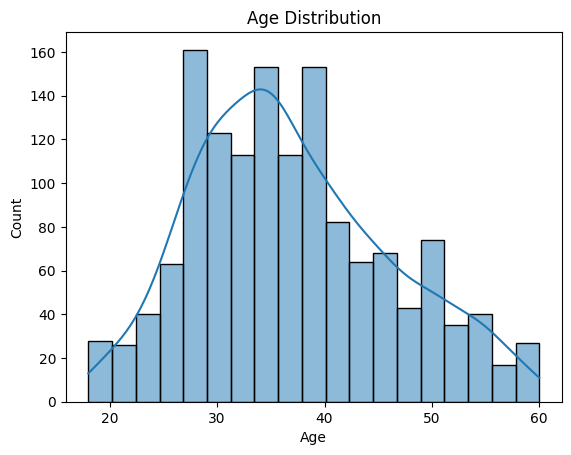

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()


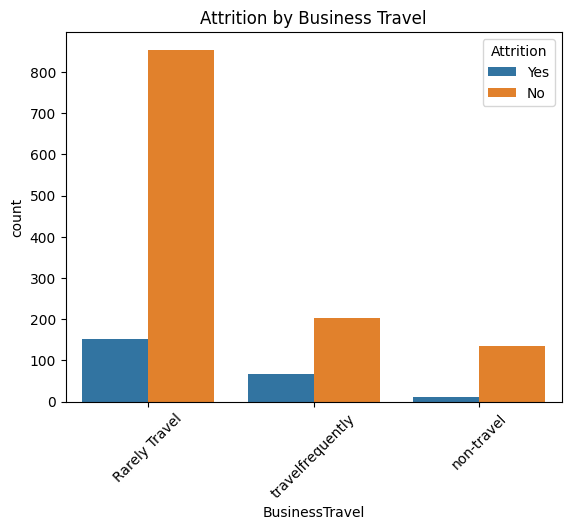

In [3]:
sns.countplot(data=df, x='BusinessTravel', hue='Attrition')
plt.title('Attrition by Business Travel')
plt.xticks(rotation=45)
plt.show()


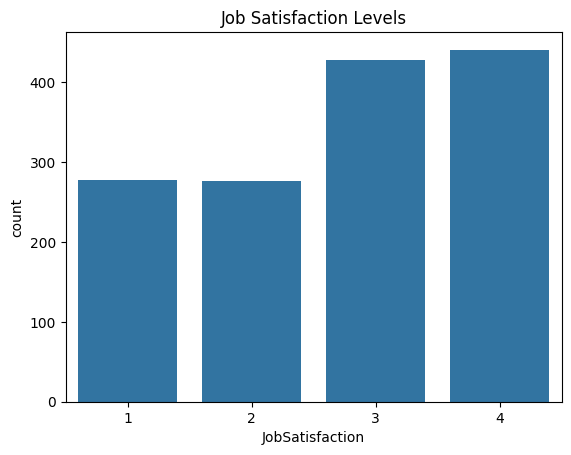

In [4]:
sns.countplot(data=df, x='JobSatisfaction')
plt.title('Job Satisfaction Levels')
plt.show()


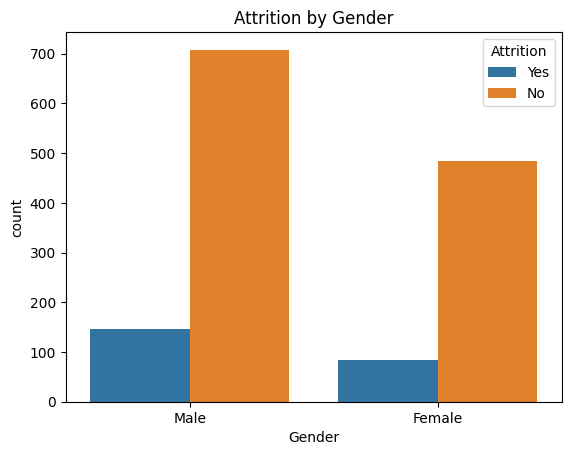

In [5]:
sns.countplot(data=df, x='Gender', hue='Attrition')
plt.title('Attrition by Gender')
plt.show()


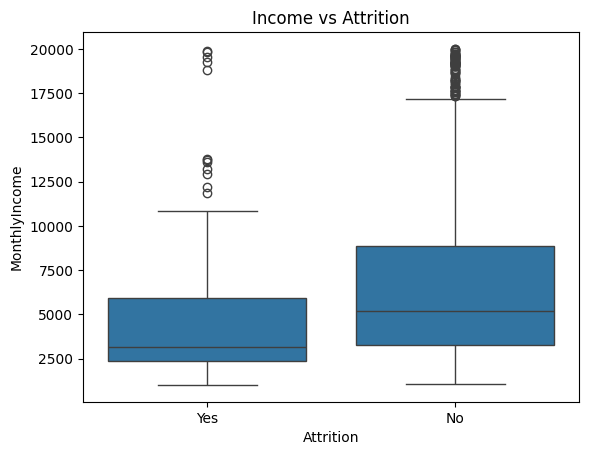

In [6]:
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title('Income vs Attrition')
plt.show()


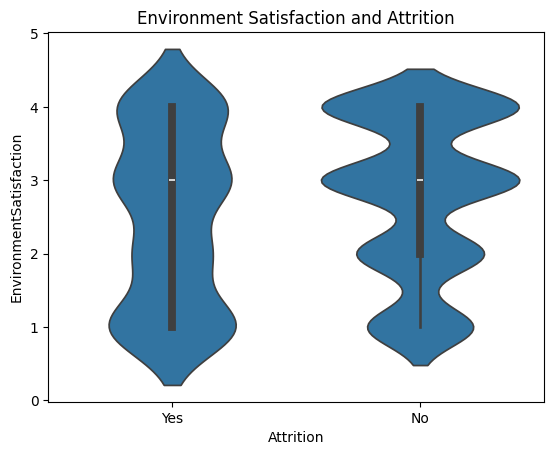

In [7]:
sns.violinplot(data=df, x='Attrition', y='EnvironmentSatisfaction')
plt.title('Environment Satisfaction and Attrition')
plt.show()


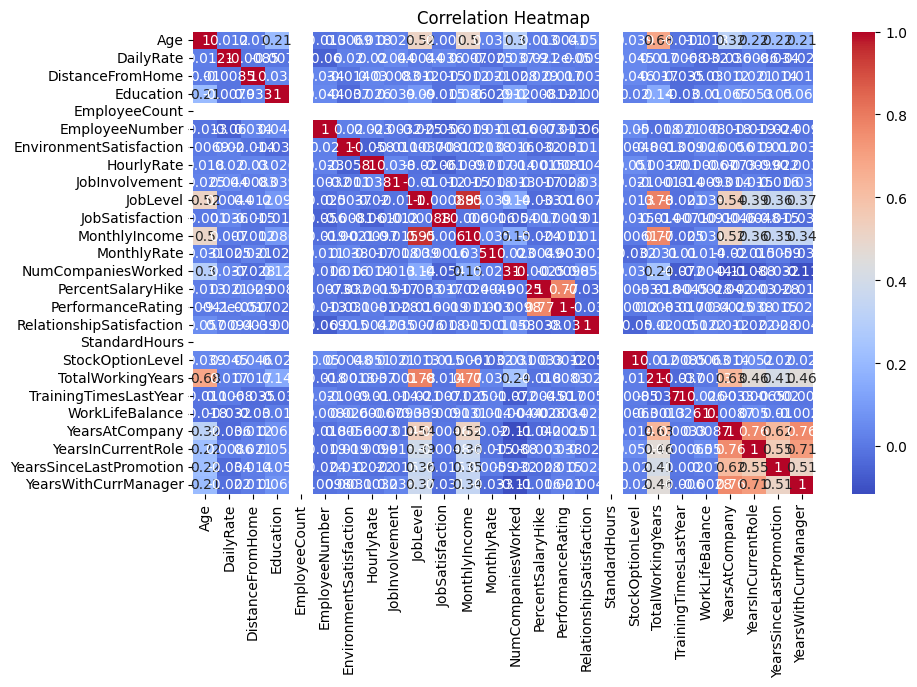

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


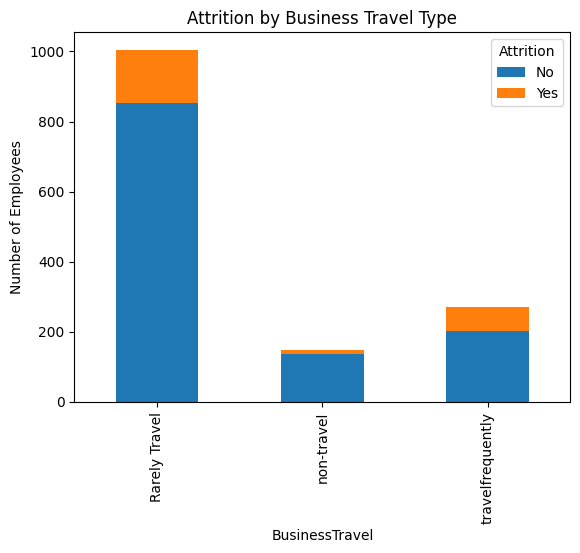

In [9]:
df.groupby(['BusinessTravel', 'Attrition']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Attrition by Business Travel Type')
plt.ylabel('Number of Employees')
plt.show()


In [10]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df_encoded = pd.get_dummies(df, drop_first=True)


In [11]:
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.85      1.00      0.92       237
           1       1.00      0.10      0.19        48

    accuracy                           0.85       285
   macro avg       0.92      0.55      0.55       285
weighted avg       0.87      0.85      0.79       285



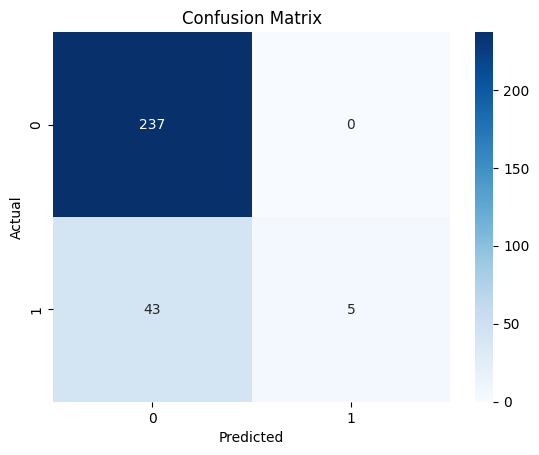

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


                Feature  Importance
11        MonthlyIncome    0.046453
19    TotalWorkingYears    0.038886
0                   Age    0.038266
1             DailyRate    0.036150
12          MonthlyRate    0.032721
5        EmployeeNumber    0.031040
2      DistanceFromHome    0.029086
1463       OverTime_Yes    0.028976
22       YearsAtCompany    0.028558
7            HourlyRate    0.027734


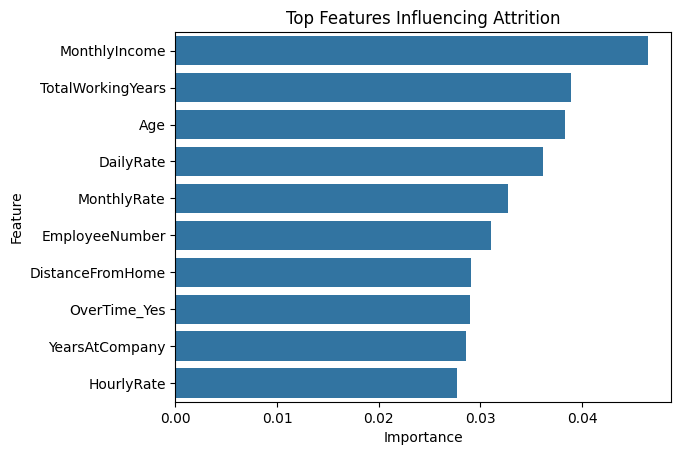

In [15]:
importances = model.feature_importances_
features = X.columns

# Top 10 most important features
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(importance_df.head(10))

# Plot
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
plt.title("Top Features Influencing Attrition")
plt.show()
